In [1]:
import seaborn as sns
import pandas as pd

In [19]:
df=sns.load_dataset('iris')
df.head()
df=df.drop(columns=['species'])
df

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [28]:
def find_anamolies(df):
    """
    Function to find anomalies in a given column of a DataFrame.
    Anomalies are defined as values that are more than 3 standard deviations from the mean.
    """
    mean = df.mean()
    std_dev = df.std()
    threshold = 3 * std_dev # 3σ
    upper_limit = mean + threshold # u + 3σ
    lower_limit = mean - threshold # u - 3σ
    outliers=[]
    for value in df:
        if value > upper_limit or value < lower_limit:
            outliers.append(value)
    return outliers

In [33]:
outliers = find_anamolies(df['sepal_width'])
outliers

[4.4]

C:\Users\smart\AppData\Local\Temp\ipykernel_11456\743684428.py:1: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df['sepal_width'], shade=True)


<Axes: xlabel='sepal_width', ylabel='Density'>

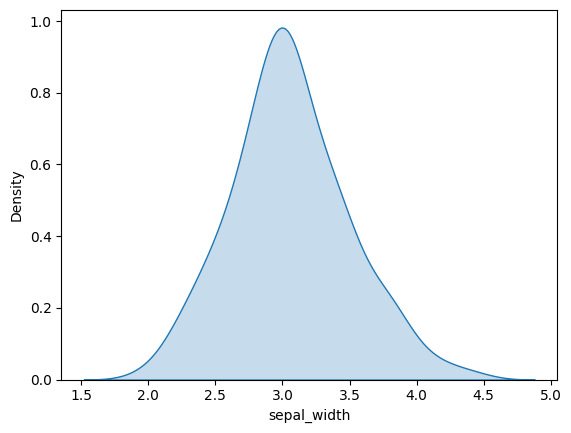

In [ ]:
sns.kdeplot(df['sepal_width'], shade=True) # close to normal distribution

In [ ]:
df['sepal_width'].skew() # skewness is close to 0.3, indicating a normal distribution

np.float64(0.31896566471359966)

### Box Plot

<Axes: >

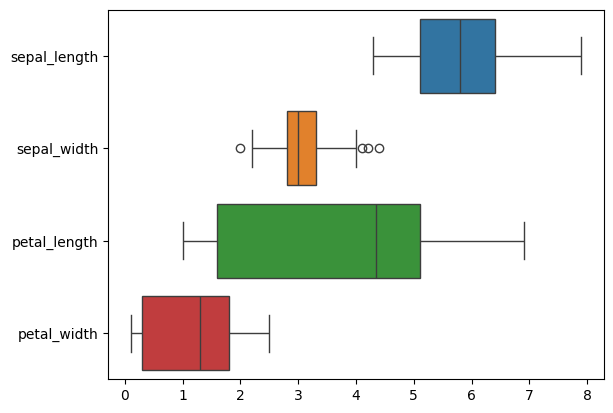

In [36]:
sns.boxplot(data=df, orient='h')

In [39]:
# InterQuartile Range (IQR) method
Q1 = df['sepal_width'].quantile(0.25)
Q3 = df['sepal_width'].quantile(0.75)   
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR    
print(f"Lower Bound: {lower_bound}, Upper Bound: {upper_bound}")

Lower Bound: 2.05, Upper Bound: 4.05


<Axes: xlabel='sepal_width'>

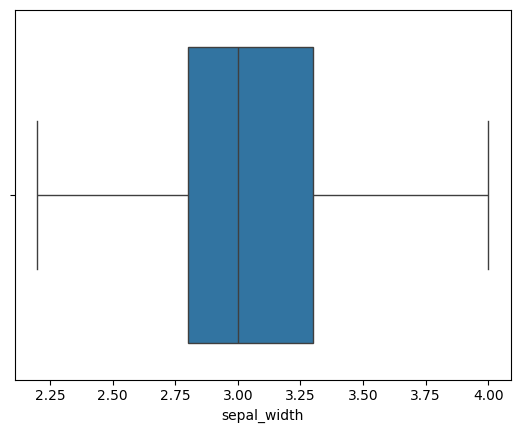

In [41]:
# Filtering out the outliers
df_filtered = df[(df['sepal_width'] >= lower_bound) & (df['sepal_width'] <= upper_bound)]
sns.boxplot(data=df_filtered['sepal_width'], orient='h') # box plot after removing outliers